# Clothing Fit / json Processing
## (Self-Guided Project)

## by Justin Sierchio

In this project, we will be looking at using clothing fit data to learn about json processing.

This data is in .csv file format and is from Kaggle at: https://www.kaggle.com/soujanyag/modcloth-data-preprocessing-for-beginner. More information related to the dataset can be found at the same link.

Note: this is a self-guided project based upon the notebook written by Soujanya G at Kaggle. I have done my best to properly cite and attribute the original work.

## Notebook Initialization

In [1]:
# Import Relevant Libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

print('Initial libraries loaded into workspace!')

Initial libraries loaded into workspace!


In [2]:
# Upload Datasets for Study
mc_data = pd.read_json('modcloth_final_data.json', lines=True)

print('Dataset uploaded!');

Dataset uploaded!


Let's display the first 5 rows for this dataset.

In [3]:
# Display 1st 5 rows of modified clothing dataset
mc_data.head()

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN


## Exploratory Data Analysis

In order to avoid potential coding errors, a good practice is to make sure all the names of the columns use underscores rather than spaces. We can accomplish this task by modifying the column names accordingly.

In [4]:
# Modify Column Names
mc_data.columns = ['item_id', 'waist', 'mc_size', 'quality', 'cup_size', 'hips', 'bra_size', 'category', 'bust', 'height', 
                   'user_name', 'length', 'fit', 'user_id', 'shoe_size', 'shoe_width', 'review_summary', 'review_test']

Now let's check the overall information for each column.

In [5]:
mc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82790 entries, 0 to 82789
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   item_id         82790 non-null  int64  
 1   waist           2882 non-null   float64
 2   mc_size         82790 non-null  int64  
 3   quality         82722 non-null  float64
 4   cup_size        76535 non-null  object 
 5   hips            56064 non-null  float64
 6   bra_size        76772 non-null  float64
 7   category        82790 non-null  object 
 8   bust            11854 non-null  object 
 9   height          81683 non-null  object 
 10  user_name       82790 non-null  object 
 11  length          82755 non-null  object 
 12  fit             82790 non-null  object 
 13  user_id         82790 non-null  int64  
 14  shoe_size       27915 non-null  float64
 15  shoe_width      18607 non-null  object 
 16  review_summary  76065 non-null  object 
 17  review_test     76065 non-null 

We notice that some of the columns have sparse data. To determine the exact amounts, let's use the 'isnull' method.

In [6]:
# Find the exact amounts of sparse data
missing_data_sum = mc_data.isnull().sum()
missing_data = pd.DataFrame({'total_missing_values': missing_data_sum,'percentage_of_missing_values': (missing_data_sum/mc_data.shape[0])*100})
missing_data

,total_missing_values,percentage_of_missing_values
item_id,0,0.000000
waist,79908,96.518903
mc_size,0,0.000000
quality,68,0.082136
cup_size,6255,7.555260
hips,26726,32.281677
bra_size,6018,7.268994
category,0,0.000000
bust,70936,85.681846
height,1107,1.337118


According to this output, only 6/18 columns have complete data. 5/18 columns are missing more than 60% of the values.

Now let's take a look at the number of unique observations. In other words, how many different possible values for each variable column exist?

In [7]:
# Find the number of unique variables
mc_data.nunique()

item_id            1378
waist                31
mc_size              29
quality               5
cup_size             12
hips                 31
bra_size             11
category              7
bust                 40
height               41
user_name         32429
length                5
fit                   3
user_id           47958
shoe_size            15
shoe_width            3
review_summary    61713
review_test       73313
dtype: int64

Now let's look at the variables that are not as unique and plot their distributions. To do this, we will construct a function called "countplot."

In [8]:
# Create Function called 'countplot'
def countplot(independent_features):
  plt.figure(figsize=(25, 25))
  for loc, feature in enumerate(independent_features):
    ax = plt.subplot(3, 4, loc+1)
    ax.set_xlabel('{}'.format(feature), fontsize=10)
    chart = sns.countplot(mc_data[feature])
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
  return None

Now we upload the columns with less unique data and plot their distributions.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

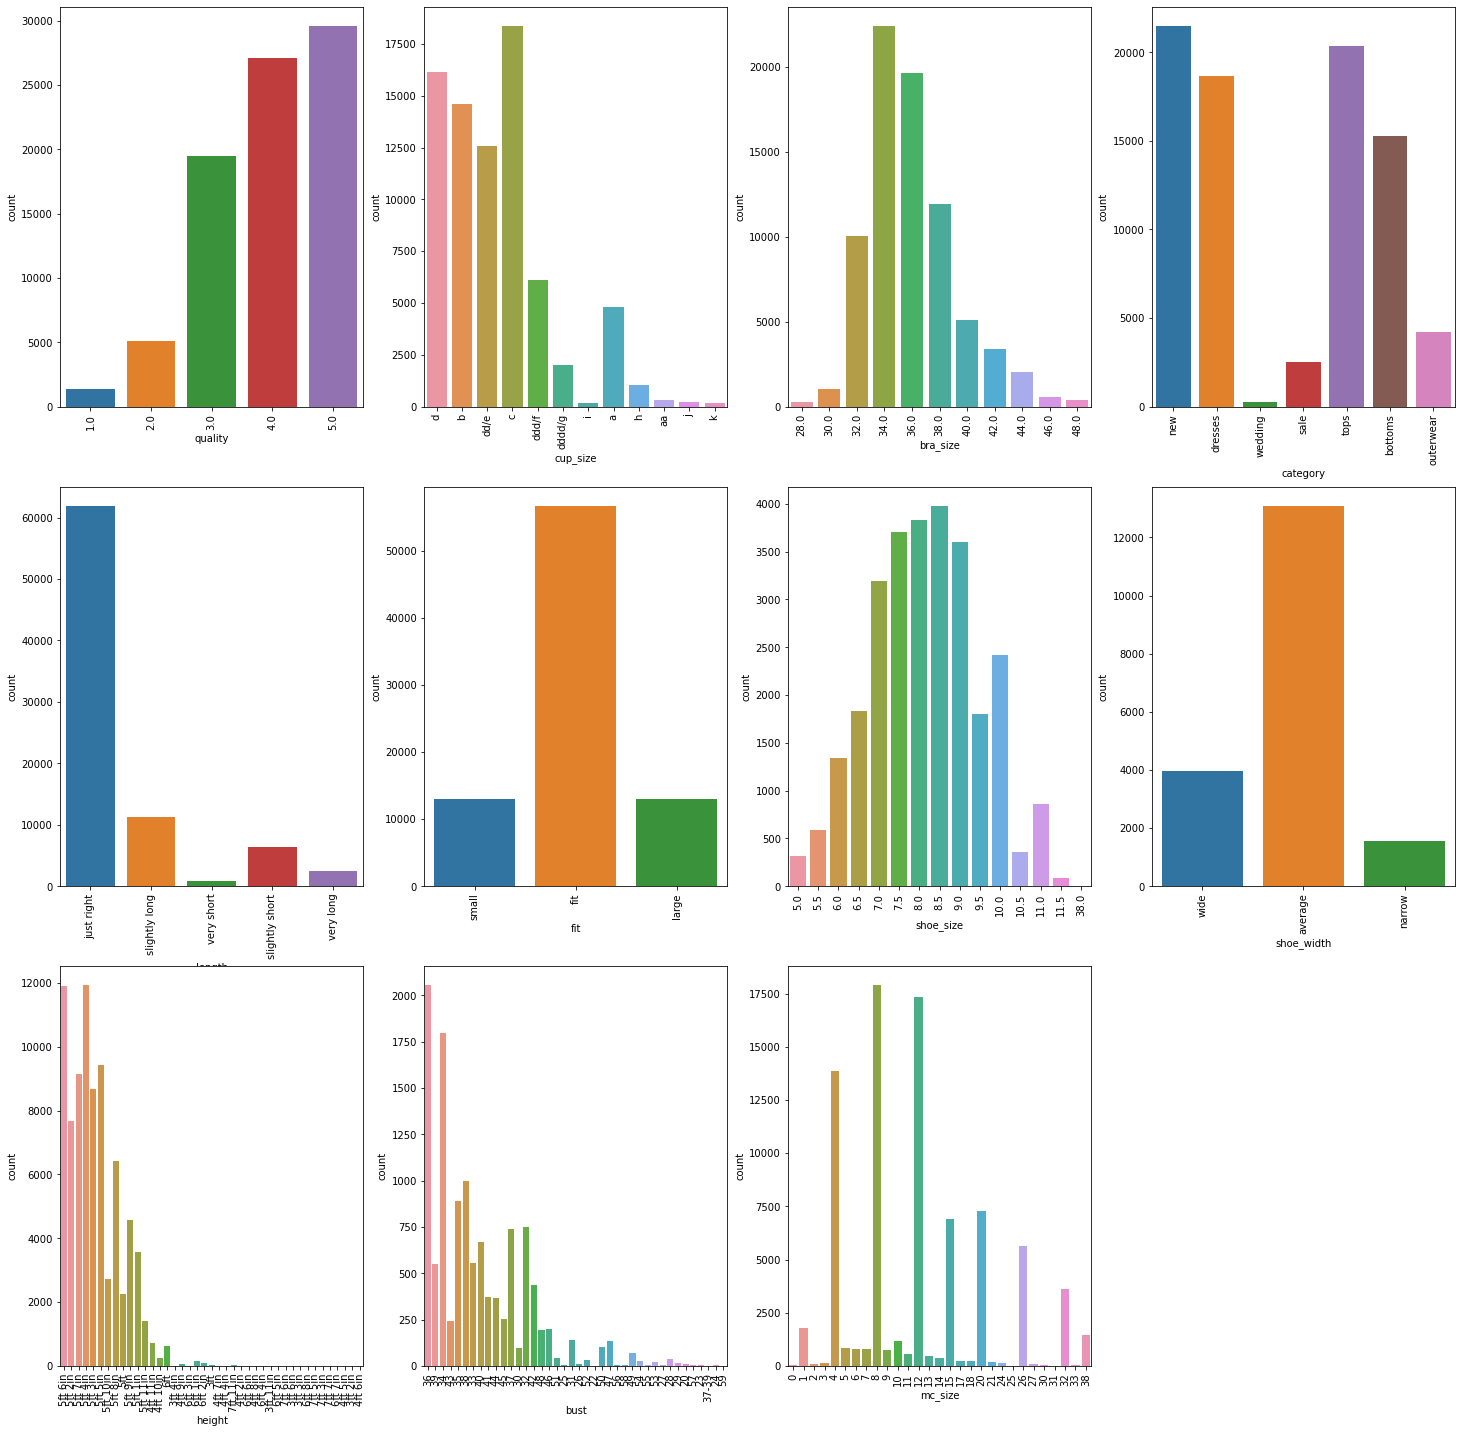

In [9]:
unique_data = ['quality', 'cup_size', 'bra_size', 'category', 'length', 'fit',  'shoe_size', 'shoe_width', 'height', 'bust', 'mc_size']
countplot(unique_data)

Looking at this data, we can make a few observations:

<ul>
    <li>cup_size - measurements represented in a specific format</li>
    <li>shoe_size - value of 38 is an outlier</li>
    <li>height - several outliers (so it might be worth converting from categorical data --> numerical values</li>
    <li>bust - replace the values 37-39 with the mean</li>
    <li>shoe_width, category, length, fit, height - these are all categorical data</li>
</ul>

Let's replace the bust data with the mean value.

In [10]:
# Replace bust values of 37-39 with 38 [mean]
mc_data.at[mc_data[mc_data.bust == '37-39'].index[0],'bust'] = '38'

Lastly, for the purposes of keeping the data in one unit system, let's convert all the US/English units to Metric.

In [11]:
# Create a US to Metric conversion function
def height_in_cms(ht):
  if ht.lower() != 'nan':
    ht = ht.replace('ft','').replace('in', '')
    h_ft = int(ht.split()[0])
    if len(ht.split()) > 1:
      h_inch = int(ht.split()[1])
    else:
      h_inch = 0
    h_inch += h_ft * 12
    h_cm = round(h_inch * 2.54, 1)
    return h_cm

In [12]:
# Apply Metric conversion function to 'height' variable
mc_data.height = mc_data.height.astype(str).apply(height_in_cms)
mc_data.head()

,item_id,waist,mc_size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_test
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,167.6,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,157.5,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,170.2,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,157.5,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN


At this juncture, let's look at handling any outliers via mean imputation.

In [13]:
# Removing outliers in 'height' column and replacing them with mean values
mc_data.height.fillna(value=mc_data.height.mean(), inplace=True)
mc_data.height.isnull().sum()

0

Now let's plot any outliers.

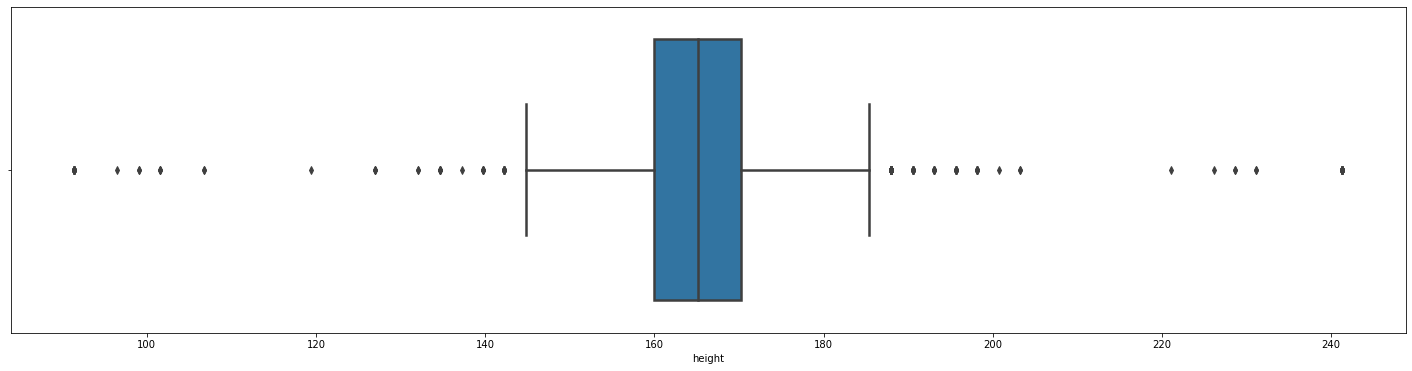

In [14]:
# Create a plot outlier function and apply it to the height column
def plot_outlier(feature):
  plt.figure(figsize=(25, 6))
  ax = sns.boxplot(x=feature, linewidth=2.5)
plot_outlier(mc_data.height)

Now let's check the upper and lower ranges for any outliers.

In [15]:
# Create a plot outlier range function
def get_outliers_range(datacolumn):
  sorted(datacolumn)
  Q1,Q3 = np.percentile(datacolumn , [25,75])
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)
  return lower_range,upper_range

In [16]:
# Find the outliers for the upper and lower ranges
ht_lower_range,ht_upper_range = get_outliers_range(mc_data.height)
ht_lower_range,ht_upper_range

(144.70000000000002, 185.49999999999997)

The conclusion at this stage is that, using the inter-quartile range (IQR) method, outliers are present above 185.49 or below 144.70.

Let's look how many outliers exist in the 'height' column.

In [17]:
# Outliers in 'height' column
mc_data[(mc_data.height < ht_lower_range) | (mc_data.height > ht_upper_range)]

,item_id,waist,mc_size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_test
468,125442,NaN,5,5.0,c,35.0,34.0,new,NaN,101.6,sarah.d.charleton,just right,fit,536627,NaN,NaN,NaN,NaN
1895,129268,NaN,20,3.0,NaN,NaN,NaN,new,NaN,190.5,fran4252,slightly short,small,768980,NaN,NaN,NaN,NaN
1952,129268,NaN,26,5.0,d,49.0,40.0,new,45,188.0,folkloregray,slightly long,fit,463032,10.5,average,NaN,NaN
2919,136482,NaN,32,4.0,ddd/f,46.0,40.0,new,NaN,188.0,krobinson2011,just right,fit,372482,NaN,NaN,NaN,NaN
3223,137865,NaN,26,4.0,h,47.0,36.0,new,NaN,188.0,Leila,just right,fit,527524,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80344,792842,NaN,12,4.0,k,60.0,48.0,outerwear,NaN,241.3,bandnerd2522,just right,small,810539,11.5,average,I need blazers to wear ov,I need blazers to wear over some of my dresses...
80713,796383,NaN,12,4.0,k,60.0,48.0,outerwear,NaN,241.3,bandnerd2522,just right,small,810539,11.5,average,"This jacket is lovely, bu","This jacket is lovely, but I couldn't move my ..."
81083,803464,NaN,4,5.0,NaN,NaN,NaN,outerwear,NaN,241.3,Ida,just right,fit,887787,NaN,NaN,Finally a blazer that fit,Finally a blazer that fits me perfectly and do...
81846,806479,NaN,15,5.0,c,40.0,34.0,outerwear,NaN,188.0,brittanna75,slightly long,large,910471,9.5,average,I am very happy with this,I am very happy with this coat. It will be a ...


There are 199 outliers in the dataset. Let's remove them.

In [18]:
# Remove outliers in the height column
mc_df = mc_data.drop(mc_data[(mc_data.height < ht_lower_range) | (mc_data.height > ht_upper_range)].index)

mc_df.reset_index(drop=True, inplace=True)
mc_df.shape

(82591, 18)

To verify that we have removed the outliers, let's use our plot outlier function again.

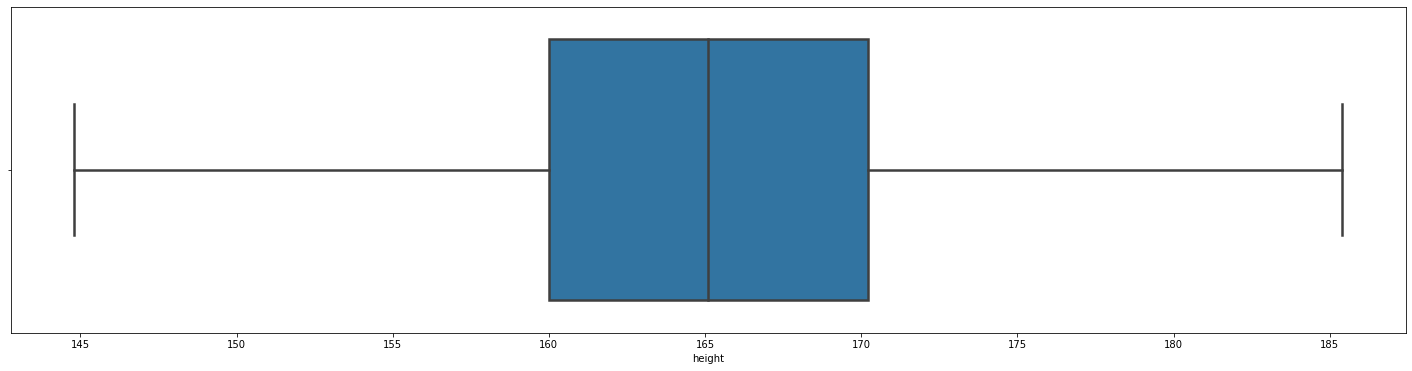

In [19]:
plot_outlier(mc_df.height)

And as we can see, there are now no outliers in the dataset.

## Value Distributions

Now let's plot the distributions for each of the remaining variables.

In [20]:
# Create a plot distribution function
def plot_dist(df, independent_features):
  plt.figure(figsize=(25, 20))
  for loc, feature in enumerate(independent_features):
    ax = plt.subplot(3, 3, loc+1)
    sns.distplot(df[feature]) # you can try histplot as well
  return None

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

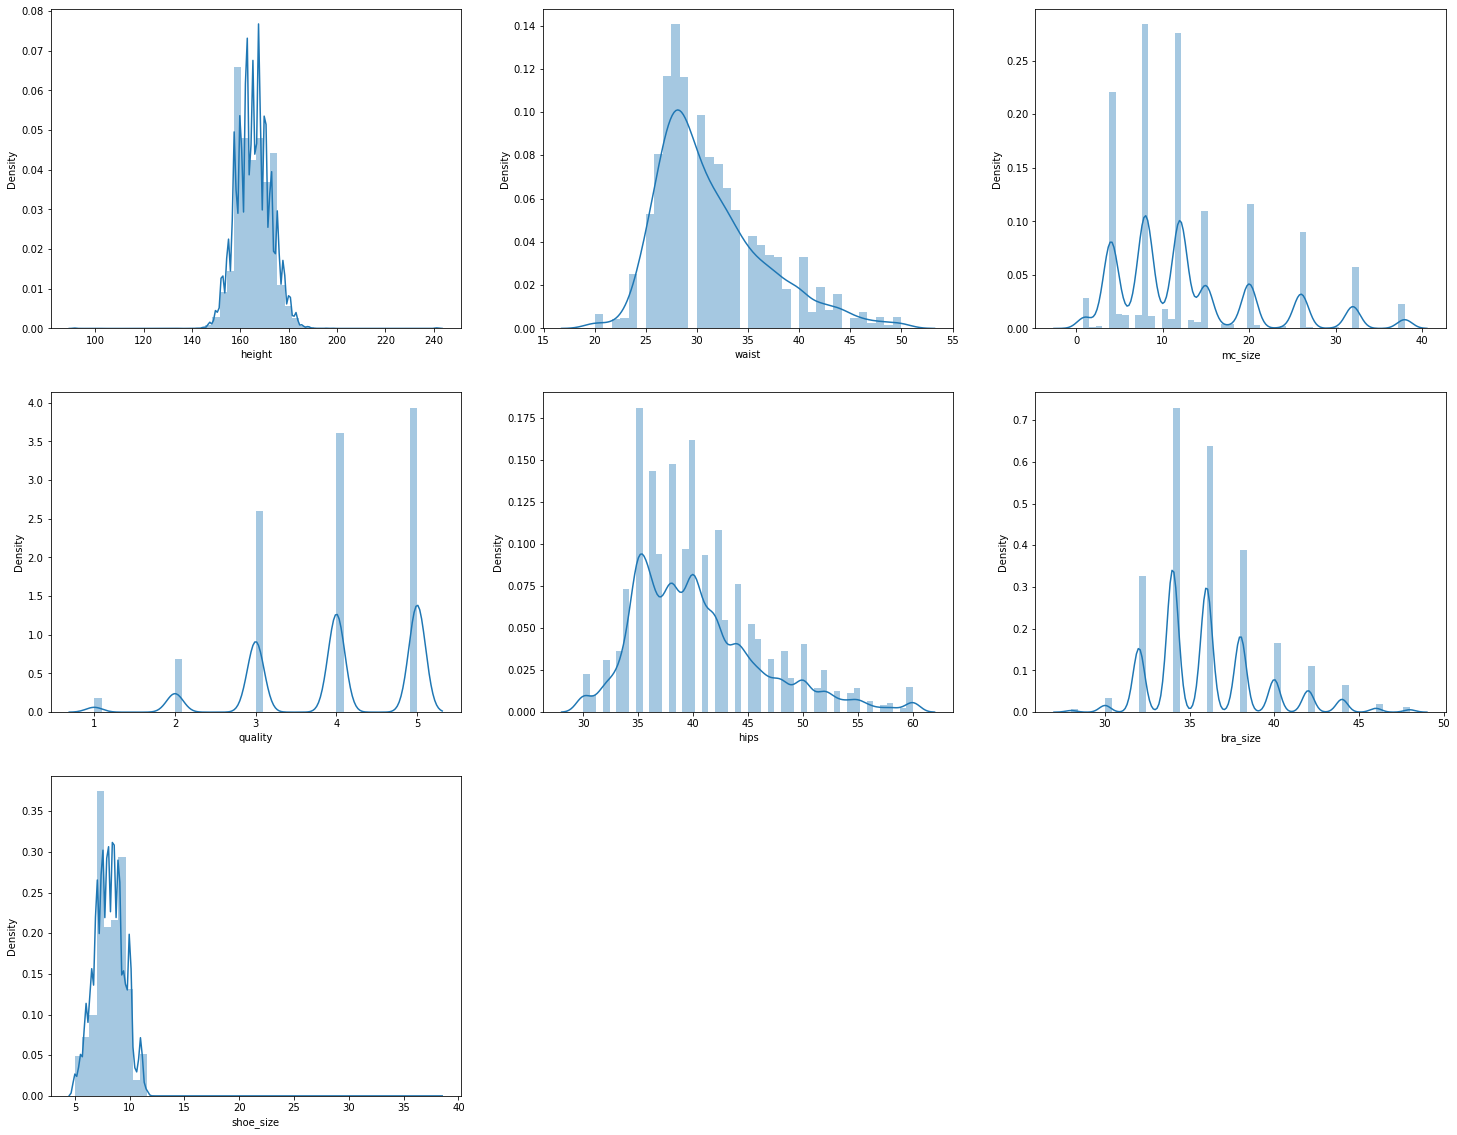

In [21]:
plot_dist(mc_data, ['height', 'waist', 'mc_size', 'quality', 'hips', 'bra_size', 'shoe_size'])

Since there are still missing values, we will have to apply some more techniques. Since we have sparse data, let's try and determine which features are most relevant. To accomplish this task, let's use K-Nearest Neighbor techniques.

In [22]:
# Import the relevant libraries
from sklearn.impute import KNNImputer

# Set the number of neighbors = 10
imputer = KNNImputer(n_neighbors=10)

# Find the relevant features
mc_data_knn_ind_features = mc_df[['waist', 'hips', 'bra_size', 'bust', 'height', 'shoe_size']]
df_filled = imputer.fit_transform(mc_data_knn_ind_features)

# Create a new dataframe for the result
knn_numeric_imputations = pd.DataFrame(data=df_filled, columns=['waist', 'hips', 'bra_size', 'bust', 'height', 'shoe_size'])

# Remove the prior columns
mc_new_df = mc_df.drop(['waist', 'hips', 'bra_size', 'bust', 'height', 'shoe_size'], axis=1)

In [23]:
# Concatenate the results with the dataframe and show the number of 'null' values
mc = pd.concat([mc_new_df, knn_numeric_imputations], axis=1)
mc.isnull().sum()

item_id               0
mc_size               0
quality              68
cup_size           6231
category              0
user_name             0
length               35
fit                   0
user_id               0
shoe_width        64023
review_summary     6710
review_test        6710
waist                 0
hips                  0
bra_size              0
bust                  0
height                0
shoe_size             0
dtype: int64

As we can see, we were able to reduce some of the missing data.

## Further Outliers

Now let's look at the outlier distribution for shoe sizes.

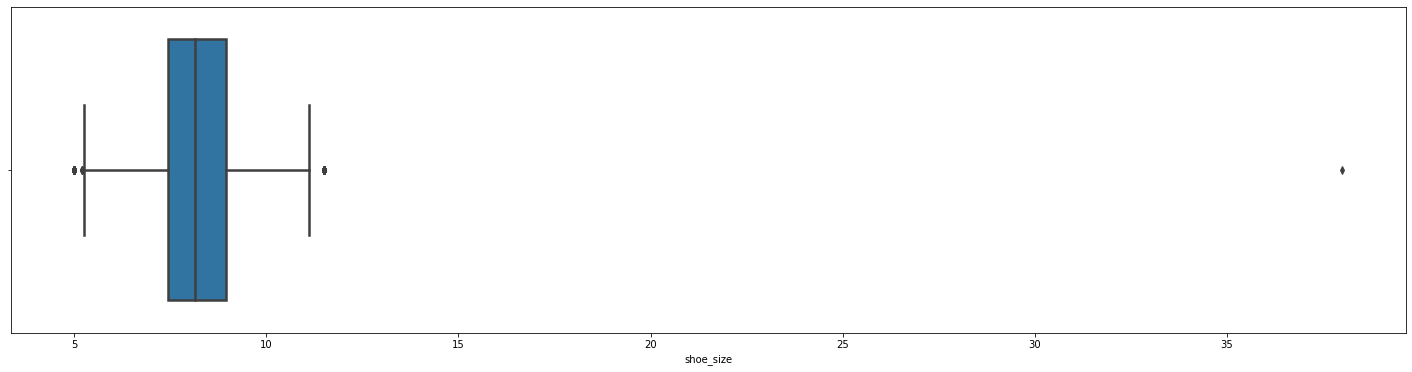

In [24]:
# Plot outliers for shoe size
plot_outlier(mc.shoe_size)

As we can see, we have a few outliers. Using IQR, we can remove them from the dataset.

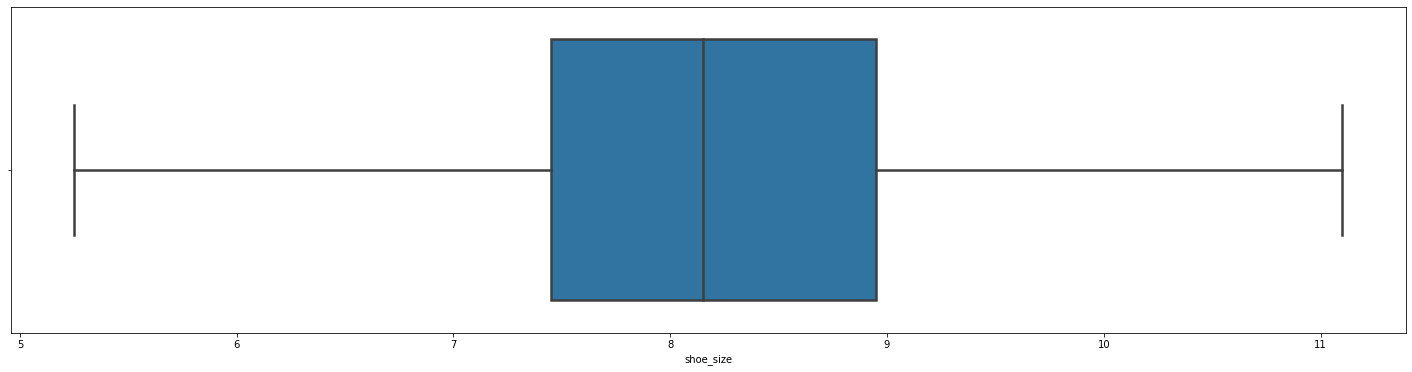

In [25]:
# Find the range of values for shoe sizes
ss_lower_range,ss_upper_range = get_outliers_range(mc.shoe_size)

# Remove outlier values from the shoe size column
mc.drop(mc[(mc.shoe_size < ss_lower_range) | (mc.shoe_size > ss_upper_range)].index, axis=0, inplace=True)

# Re-plot the outliers for shoe size
plot_outlier(mc.shoe_size)

As we can see, now there are no outliers in the shoe size category.

## Transform Categorical Variables --> Numeric

Let's begin with cup size using conversion data from https://www.blitzresults.com/en/bra-size/. Using that data we can create a conversion function that (1) converts cup sizes to CM and (2) replaces missing data with mean values.

In [26]:
# Create cup size conversion function
def convert_cup_size_to_cms(cup_size_code):
  if cup_size_code == 'aa':
    return 10, 11
  if cup_size_code == 'a':
    return 12, 13
  if cup_size_code == 'b':
    return 14, 15
  if cup_size_code == 'c':
    return 16, 17
  if cup_size_code == 'd':
    return 18, 19
  if cup_size_code == 'dd/e':
    return 20, 21
  if cup_size_code == 'ddd/f':
    return 22, 23
  if cup_size_code == 'dddd/g':
    return 24, 25
  if cup_size_code == 'h':
    return 26, 27
  if cup_size_code == 'i':
    return 28, 29
  if cup_size_code == 'j':
    return 30, 31
  if cup_size_code == 'k':
    return 32, 33 
  else:
    return str('unknown')

In [27]:
mc['cup_size_in_cms'] = mc.cup_size.apply(convert_cup_size_to_cms)
mc.head()

,item_id,mc_size,quality,cup_size,category,user_name,length,fit,user_id,shoe_width,review_summary,review_test,waist,hips,bra_size,bust,height,shoe_size,cup_size_in_cms
0,123373,7,5.0,d,new,Emily,just right,small,991571,NaN,NaN,NaN,29.0,38.0,34.0,36.0,167.600000,7.75,"(18, 19)"
1,123373,13,3.0,b,new,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,31.0,30.0,36.0,37.8,157.500000,7.25,"(14, 15)"
2,123373,7,2.0,b,new,Ugggh,slightly long,small,395665,NaN,NaN,NaN,30.0,35.9,32.0,32.9,170.200000,9.00,"(14, 15)"
3,123373,21,5.0,dd/e,new,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,31.1,41.7,38.6,37.8,165.472612,8.45,"(20, 21)"
4,123373,18,5.0,b,new,dberrones1,slightly long,small,944840,NaN,NaN,NaN,31.1,39.2,36.0,37.4,157.500000,7.40,"(14, 15)"


In [28]:
# Split the cup size data to find the ranges of values
def split_cup_size_data(data, index):
  if data.lower() == 'unknown':
    return 0
  value = data.replace('(','').replace(')','').replace(',','')
  return value.split()[index]

# Add the start and end cup sizes to the dataset
mc['cup_size_start_in_cms'] =  mc.cup_size_in_cms.astype(str).apply(lambda x : split_cup_size_data(x, 0))
mc['cup_size_end_in_cms'] =  mc.cup_size_in_cms.astype(str).apply(lambda x : split_cup_size_data(x, 1))

# Display the modified dataset
mc.head()

,item_id,mc_size,quality,cup_size,category,user_name,length,fit,user_id,shoe_width,...,review_test,waist,hips,bra_size,bust,height,shoe_size,cup_size_in_cms,cup_size_start_in_cms,cup_size_end_in_cms
0,123373,7,5.0,d,new,Emily,just right,small,991571,NaN,...,NaN,29.0,38.0,34.0,36.0,167.600000,7.75,"(18, 19)",18,19
1,123373,13,3.0,b,new,sydneybraden2001,just right,small,587883,NaN,...,NaN,31.0,30.0,36.0,37.8,157.500000,7.25,"(14, 15)",14,15
2,123373,7,2.0,b,new,Ugggh,slightly long,small,395665,NaN,...,NaN,30.0,35.9,32.0,32.9,170.200000,9.00,"(14, 15)",14,15
3,123373,21,5.0,dd/e,new,alexmeyer626,just right,fit,875643,NaN,...,NaN,31.1,41.7,38.6,37.8,165.472612,8.45,"(20, 21)",20,21
4,123373,18,5.0,b,new,dberrones1,slightly long,small,944840,NaN,...,NaN,31.1,39.2,36.0,37.4,157.500000,7.40,"(14, 15)",14,15


Now let's convert the newly created columns into integers.

In [29]:
mc['cup_size_start_in_cms'] = mc.cup_size_start_in_cms.astype('int')
mc['cup_size_end_in_cms'] = mc.cup_size_end_in_cms.astype('int')

And, as we stated earlier, let's replace the missing values with the mean values for these new variables.

In [30]:
# Replace missing values with mean
mc['cup_size_start_in_cms']  = mc.cup_size_start_in_cms.mask(mc.cup_size_start_in_cms==0).fillna(value=mc.cup_size_start_in_cms.mean())
mc['cup_size_end_in_cms']  = mc.cup_size_end_in_cms.mask(mc.cup_size_end_in_cms==0).fillna(value=mc.cup_size_end_in_cms.mean())

Finally, let's do a check for null values and then remove the old columns from the dataset.

In [31]:
mc[mc.cup_size.isnull()]

,item_id,mc_size,quality,cup_size,category,user_name,length,fit,user_id,shoe_width,...,review_test,waist,hips,bra_size,bust,height,shoe_size,cup_size_in_cms,cup_size_start_in_cms,cup_size_end_in_cms
61,124024,9,5.0,NaN,new,cdpase,just right,fit,277450,NaN,...,NaN,30.0,37.7,34.4,36.8,160.0,7.20,unknown,16.041532,16.965888
70,124124,26,5.0,NaN,new,inevitable.cities,slightly long,fit,29730,NaN,...,NaN,34.2,40.0,37.6,35.4,175.3,10.10,unknown,16.041532,16.965888
72,124124,26,3.0,NaN,new,Josephine,slightly short,fit,497767,NaN,...,NaN,34.2,40.0,37.6,35.4,175.3,10.10,unknown,16.041532,16.965888
99,124124,12,1.0,NaN,new,christine.koch,very short,small,435872,NaN,...,NaN,32.7,46.5,35.2,38.0,170.2,8.80,unknown,16.041532,16.965888
101,124124,15,4.0,NaN,new,meghanmurphy,just right,small,788667,NaN,...,NaN,31.0,39.8,34.4,36.0,157.5,6.90,unknown,16.041532,16.965888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82525,807384,8,3.0,NaN,outerwear,streamlineblue,just right,fit,336703,NaN,...,This coat is awesome! Fit/length/color/style i...,30.6,38.5,35.6,35.7,162.6,7.85,unknown,16.041532,16.965888
82562,807722,4,5.0,NaN,outerwear,melissalehtonen,just right,fit,357068,NaN,...,Love it!!!!! P,31.0,39.8,34.4,36.0,157.5,6.90,unknown,16.041532,16.965888
82565,807722,4,5.0,NaN,outerwear,Hufsa,just right,fit,475911,NaN,...,Perfect for work dresses.,30.0,37.7,34.4,36.8,160.0,7.20,unknown,16.041532,16.965888
82578,807722,8,4.0,NaN,outerwear,spoons_82,just right,small,236365,NaN,...,Had to return I'm usually a medium in shirts ...,29.3,38.0,34.0,37.7,162.6,7.80,unknown,16.041532,16.965888


In [32]:
# Drop unnecessary columns
mc = mc.drop(['cup_size', 'cup_size_in_cms'], axis = 1)
mc.reset_index(drop=True,  inplace=True)

In [33]:
mc.head()

,item_id,mc_size,quality,category,user_name,length,fit,user_id,shoe_width,review_summary,review_test,waist,hips,bra_size,bust,height,shoe_size,cup_size_start_in_cms,cup_size_end_in_cms
0,123373,7,5.0,new,Emily,just right,small,991571,NaN,NaN,NaN,29.0,38.0,34.0,36.0,167.600000,7.75,18.0,19.0
1,123373,13,3.0,new,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,31.0,30.0,36.0,37.8,157.500000,7.25,14.0,15.0
2,123373,7,2.0,new,Ugggh,slightly long,small,395665,NaN,NaN,NaN,30.0,35.9,32.0,32.9,170.200000,9.00,14.0,15.0
3,123373,21,5.0,new,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,31.1,41.7,38.6,37.8,165.472612,8.45,20.0,21.0
4,123373,18,5.0,new,dberrones1,slightly long,small,944840,NaN,NaN,NaN,31.1,39.2,36.0,37.4,157.500000,7.40,14.0,15.0


## One-Hot Encoding

Now let's visualize the categorical variables against the dependent feature fit in the last section.

In [34]:
# Create a function to plot categorical variables against dependent feature fits.
def countplot_wrt_target(independent_features, df):
  plt.figure(figsize=(28, 10))
  for loc, feature in enumerate(independent_features):
    ax = plt.subplot(1, 3, loc+1)
    ax.set_xlabel('{}'.format(feature), fontsize=10)
    chart = sns.countplot(x=df[feature], hue=df.fit)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
  return None

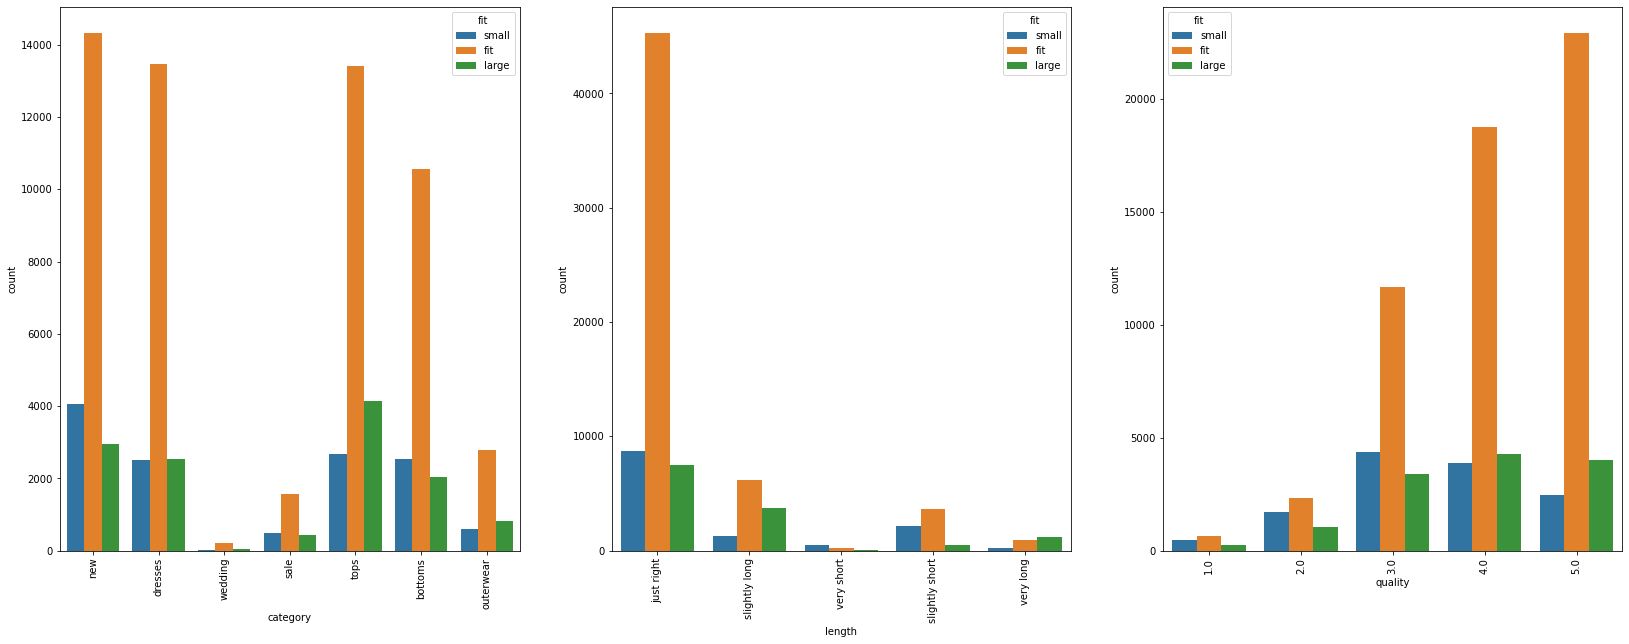

In [35]:
countplot_wrt_target(['category', 'length', 'quality'], mc)

Now let's use data from ttps://images-na.ssl-images-amazon.com/images/I/71u90X9oX3S.pdf to identify shoe width from shoe size.

In [36]:
# Replace 'NaN' with average shoe width (assumed to be true)
mc.shoe_width = mc.shoe_width.fillna('average')

In [37]:
# Use reference to replace shoe size with shoe width ranges
mc['shoe_width_in_inches'] = np.where(((mc.shoe_size >= 5) & (mc.shoe_size < 5.5)) & (mc.shoe_width == 'narrow') , 2.81, 
np.where(((mc.shoe_size >= 5) & (mc.shoe_size < 5.5)) & (mc.shoe_width == 'average') , 3.19, 
np.where(((mc.shoe_size >= 5) & (mc.shoe_size < 5.5)) & (mc.shoe_width == 'wide') , 3.56,
np.where(((mc.shoe_size >= 5.5) & (mc.shoe_size < 6)) & (mc.shoe_width == 'narrow') , 2.87, 
np.where(((mc.shoe_size >= 5.5) & (mc.shoe_size < 6)) & (mc.shoe_width == 'average') , 3.25, 
np.where(((mc.shoe_size >= 5.5) & (mc.shoe_size < 6)) & (mc.shoe_width == 'wide') , 3.62, 
np.where(((mc.shoe_size >= 6) & (mc.shoe_size < 6.5)) & (mc.shoe_width == 'narrow') , 2.94, 
np.where(((mc.shoe_size >= 6) & (mc.shoe_size < 6.5)) & (mc.shoe_width == 'average') , 3.31, 
np.where(((mc.shoe_size >= 6) & (mc.shoe_size < 6.5)) & (mc.shoe_width == 'wide') , 3.69,
np.where(((mc.shoe_size >= 6.5) & (mc.shoe_size < 7)) & (mc.shoe_width == 'narrow') , 3, 
np.where(((mc.shoe_size >= 6.5) & (mc.shoe_size < 7)) & (mc.shoe_width == 'average') , 3.37, 
np.where(((mc.shoe_size >= 6.5) & (mc.shoe_size < 7)) & (mc.shoe_width == 'wide') , 3.75,
np.where(((mc.shoe_size >= 7) & (mc.shoe_size < 7.5)) & (mc.shoe_width == 'narrow') , 3.06, 
np.where(((mc.shoe_size >= 7) & (mc.shoe_size < 7.5)) & (mc.shoe_width == 'average') , 3.44, 
np.where(((mc.shoe_size >= 7) & (mc.shoe_size < 7.5)) & (mc.shoe_width == 'wide') , 3.81, 
np.where(((mc.shoe_size >= 7.5) & (mc.shoe_size < 8)) & (mc.shoe_width == 'narrow') , 3.12, 
np.where(((mc.shoe_size >= 7.5) & (mc.shoe_size < 8)) & (mc.shoe_width == 'average') , 3.5, 
np.where(((mc.shoe_size >= 7.5) & (mc.shoe_size < 8)) & (mc.shoe_width == 'wide') , 3.87, 
np.where(((mc.shoe_size >= 8) & (mc.shoe_size < 8.5)) & (mc.shoe_width == 'narrow') , 3.19, 
np.where(((mc.shoe_size >= 8) & (mc.shoe_size < 8.5)) & (mc.shoe_width == 'average') , 3.56, 
np.where(((mc.shoe_size >= 8) & (mc.shoe_size < 8.5)) & (mc.shoe_width == 'wide') , 3.94, 
np.where(((mc.shoe_size >= 8.5) & (mc.shoe_size < 9)) & (mc.shoe_width == 'narrow') , 3.25, 
np.where(((mc.shoe_size >= 8.5) & (mc.shoe_size < 9)) & (mc.shoe_width == 'average') , 3.62, 
np.where(((mc.shoe_size >= 8.5) & (mc.shoe_size < 9)) & (mc.shoe_width == 'wide') , 4, 
np.where(((mc.shoe_size >= 9) & (mc.shoe_size < 9.5)) & (mc.shoe_width == 'narrow') , 3.37, 
np.where(((mc.shoe_size >= 9) & (mc.shoe_size < 9.5)) & (mc.shoe_width == 'average') , 3.69, 
np.where(((mc.shoe_size >= 9) & (mc.shoe_size < 9.5)) & (mc.shoe_width == 'wide') , 4.06, 
np.where(((mc.shoe_size >= 9.5) & (mc.shoe_size < 10)) & (mc.shoe_width == 'narrow') , 3.37, 
np.where(((mc.shoe_size >= 9.5) & (mc.shoe_size < 10)) & (mc.shoe_width == 'average') , 3.75, 
np.where(((mc.shoe_size >= 9.5) & (mc.shoe_size < 10)) & (mc.shoe_width == 'wide') , 4.12, 
np.where(((mc.shoe_size >= 10) & (mc.shoe_size < 10.5)) & (mc.shoe_width == 'narrow') , 3.44, 
np.where(((mc.shoe_size >= 10) & (mc.shoe_size < 10.5)) & (mc.shoe_width == 'average') , 3.75, 
np.where(((mc.shoe_size >= 10) & (mc.shoe_size < 10.5)) & (mc.shoe_width == 'wide') , 4.19, 
np.where(((mc.shoe_size >= 10.5) & (mc.shoe_size < 11)) & (mc.shoe_width == 'narrow') , 3.5, 
np.where(((mc.shoe_size >= 10.5) & (mc.shoe_size < 11)) & (mc.shoe_width == 'average') , 3.87, 
np.where(((mc.shoe_size >= 10.5) & (mc.shoe_size < 11)) & (mc.shoe_width == 'wide') , 4.19, 
np.where(((mc.shoe_size >= 11) & (mc.shoe_size < 12)) & (mc.shoe_width == 'narrow') , 3.56, 
np.where(((mc.shoe_size >= 11) & (mc.shoe_size < 12)) & (mc.shoe_width == 'average') , 3.94, 
np.where(((mc.shoe_size >= 11) & (mc.shoe_size < 12)) & (mc.shoe_width == 'wide') , 4.19,
np.nan)))))))))))))))))))))))))))))))))))))))

In [38]:
# Eliminate the shoe width column from the dataset
mc.drop(['shoe_width'], axis=1, inplace=True)

Now let's look at feature 'length' through using one hot encoding.

In [39]:
# Replace 'NaN' values in length with 'unknown'
mc.length = mc.length.fillna('unknown')

Now we apply one-hot encoding by creating a dummy variable.

In [40]:
# Using dummy variables to apply one hot encoding
length_dummies  = pd.get_dummies(mc['length'])
length_dummies.columns = ['just_right','slightly_long','very_short','slightly_short','very_long', 'length_unkown']

category_dummies  = pd.get_dummies(mc['category'])
category_dummies.columns = ['new','dresses','wedding','sale','tops', 'bottoms','outerwear']

model_input_df = pd.concat([mc, length_dummies,category_dummies], axis = 1)
model_input_df.drop(['length'], axis=1, inplace=True)
model_input_df.drop(['category'], axis=1, inplace=True)

# Create a target variable 
fit = {'small':0, 'fit':1, 'large':2}
model_input_df['fit'] = model_input_df['fit'].map(fit)

Lastly, we drop 'item_id', 'user_id' and 'user_name' since they serve no real value to our dataset.

In [41]:
# Drop 'item_id', 'user_id' and 'user_name'
model_input_df.drop(['item_id'], axis=1, inplace=True)
model_input_df.drop(['user_id'], axis=1, inplace=True)
model_input_df.drop(['user_name'], axis=1, inplace=True)

So we now show our final, usable clothing fit dataset.

In [42]:
# Display final, usable clothing fit dataset
model_input_df.head()

,mc_size,quality,fit,review_summary,review_test,waist,hips,bra_size,bust,height,...,slightly_short,very_long,length_unkown,new,dresses,wedding,sale,tops,bottoms,outerwear
0,7,5.0,0,NaN,NaN,29.0,38.0,34.0,36.0,167.600000,...,0,0,0,0,0,1,0,0,0,0
1,13,3.0,0,NaN,NaN,31.0,30.0,36.0,37.8,157.500000,...,0,0,0,0,0,1,0,0,0,0
2,7,2.0,0,NaN,NaN,30.0,35.9,32.0,32.9,170.200000,...,0,0,0,0,0,1,0,0,0,0
3,21,5.0,1,NaN,NaN,31.1,41.7,38.6,37.8,165.472612,...,0,0,0,0,0,1,0,0,0,0
4,18,5.0,0,NaN,NaN,31.1,39.2,36.0,37.4,157.500000,...,0,0,0,0,0,1,0,0,0,0


## Results and Discussion

In this self-guided project, we can see the following:

<ul>
    <li> KNN algorithms can impute missing numerical feature data</li>
    <li> We can use one-hot encoding for categorical feature data</li>
    <li> Outliers can be removed using IQR</li>
    <li> It is important to transform categorical measurement data into a numerical format</li>
</ul>

## Conclusion

The goal of this self-guided project was to different pre-processing techniques and json processing. We were able to upload a real-world dataset, clean the data systematically, perform several different exploratory data analysis, make useful data visualizations. Hopefully others find this exericse useful. Thanks for reading!